In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('SP500_close_price_no_missing.csv')

In [3]:
no_of_rows = df.shape[0]
print("no of rows:", no_of_rows)

no_of_cols = df.shape[1]
print("no of cols:", no_of_cols)

no of rows: 1043
no of cols: 472


In [4]:
# Problem 1 - Task a) 1)

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Loading the dataset
df = pd.read_csv("SP500_close_price_no_missing.csv")

# Extracting date column and stock prices columns
dates = df.iloc[:, 0]
stock_prices = df.iloc[:, 1:]

# Calculating log returns
log_returns = np.log(stock_prices / stock_prices.shift(1)).dropna()

print(log_returns)

# Fitting PCA model
pca = PCA()
pca.fit(log_returns)

# Accessing principal components and explained variance
principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Print results
#print("Principal Components:")
#print(principal_components)
#print("\nExplained Variance:")
#print(explained_variance)

           MMM       ACE       ABT       ANF      ADBE       AMD       AES  \
1    -0.001384 -0.000643  0.009366 -0.031688  0.007006  0.034806  0.004773   
2     0.000000 -0.003382  0.000000 -0.015596  0.022282  0.015837  0.013402   
3    -0.006134 -0.004365 -0.002074 -0.033434  0.001551 -0.025001  0.017081   
4     0.001044 -0.007481  0.004143  0.000747 -0.007153  0.015982  0.000000   
5     0.010613 -0.013145 -0.008930  0.012429  0.028310  0.039961 -0.001541   
...        ...       ...       ...       ...       ...       ...       ...   
1038  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1039 -0.004201  0.001550  0.003277  0.005686 -0.000937  0.000000  0.029256   
1040  0.002703  0.002235 -0.005467  0.016518 -0.007258  0.003766  0.010493   
1041 -0.005232 -0.001719  0.001972  0.002437 -0.013992 -0.011342 -0.024658   
1042 -0.009208 -0.012027 -0.014773 -0.004181 -0.005487  0.015095 -0.017993   

           AET       AFL         A  ...       WYN      WYNN    

In [6]:
# Problem 1 - Task a)2)

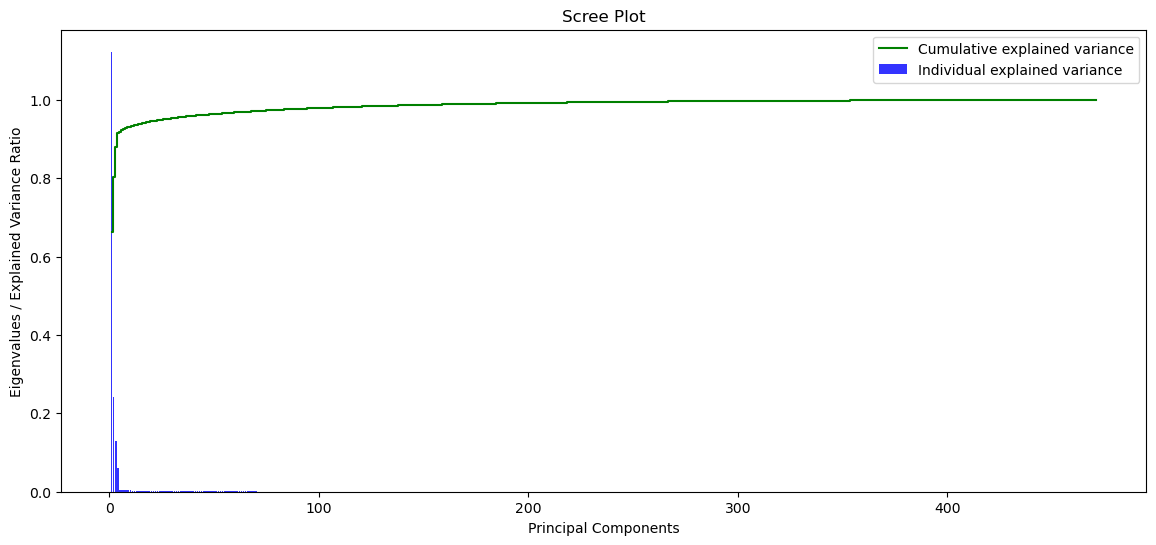

In [5]:
import matplotlib.pyplot as plt

# Getting the eigenvalues
eigenvalues = pca.explained_variance_

# Plotting the scree plot
plt.figure(figsize=(14, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.8, align='center', label='Individual explained variance', color = 'blue')
plt.step(range(1, len(eigenvalues) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance', color = 'green')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues / Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.show()

In [8]:
# Problem 1 - Task a)3)

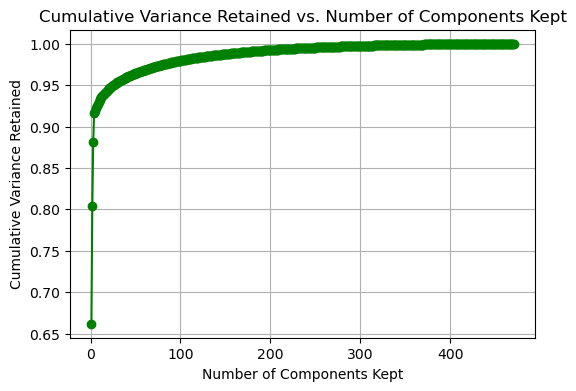

In [6]:
# Plotting the cumulative variance retained as top N components are kept
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='green')
plt.xlabel('Number of Components Kept')
plt.ylabel('Cumulative Variance Retained')
plt.title('Cumulative Variance Retained vs. Number of Components Kept')
plt.grid(True)
plt.show()

In [10]:
# Problem 1 - Task a)4)

In [7]:
import numpy as np

# Setting the desired threshold for cumulative variance
threshold_variance = 0.8

# Finding the number of components needed to reach the threshold
num_components = np.argmax(cumulative_explained_variance >= threshold_variance) + 1

print(f"Number of components needed to capture at least {threshold_variance * 100}% of the total variance: {num_components}")

Number of components needed to capture at least 80.0% of the total variance: 2


In [12]:
# Problem 1 - Task b)1)

In [8]:
# Resetting the index of log_returns
log_returns = log_returns.reset_index(drop=True)

# Concatenating log_returns and dates
log_returns = pd.concat([dates.drop(0), log_returns], axis=1)

print(log_returns)

            date       MMM       ACE       ABT       ANF      ADBE       AMD  \
1     2011-01-04  0.000000 -0.003382  0.000000 -0.015596  0.022282  0.015837   
2     2011-01-05 -0.006134 -0.004365 -0.002074 -0.033434  0.001551 -0.025001   
3     2011-01-06  0.001044 -0.007481  0.004143  0.000747 -0.007153  0.015982   
4     2011-01-07  0.010613 -0.013145 -0.008930  0.012429  0.028310  0.039961   
5     2011-01-10  0.006747  0.004620 -0.002088 -0.025393  0.000607 -0.094658   
...          ...       ...       ...       ...       ...       ...       ...   
1039  2014-12-26  0.002703  0.002235 -0.005467  0.016518 -0.007258  0.003766   
1040  2014-12-29 -0.005232 -0.001719  0.001972  0.002437 -0.013992 -0.011342   
1041  2014-12-30 -0.009208 -0.012027 -0.014773 -0.004181 -0.005487  0.015095   
1042  2014-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
0            NaN -0.001384 -0.000643  0.009366 -0.031688  0.007006  0.034806   

           AES       AET       AFL  ...

In [9]:
# Ensuring the 'date' column is in string format
log_returns['date'] = log_returns['date'].astype(str)

In [10]:
# Extracting the 1st principal component
pc1 = pca.components_[0]

In [11]:
# Calculating the time series of the 1st principal component
time_series_pc1 = np.dot(log_returns.iloc[:, 1:], pc1)

In [12]:
# Dropping rows with NaN values
valid_indices = ~np.isnan(time_series_pc1)
time_series_pc1 = time_series_pc1[valid_indices]
log_returns = log_returns.iloc[valid_indices, :]

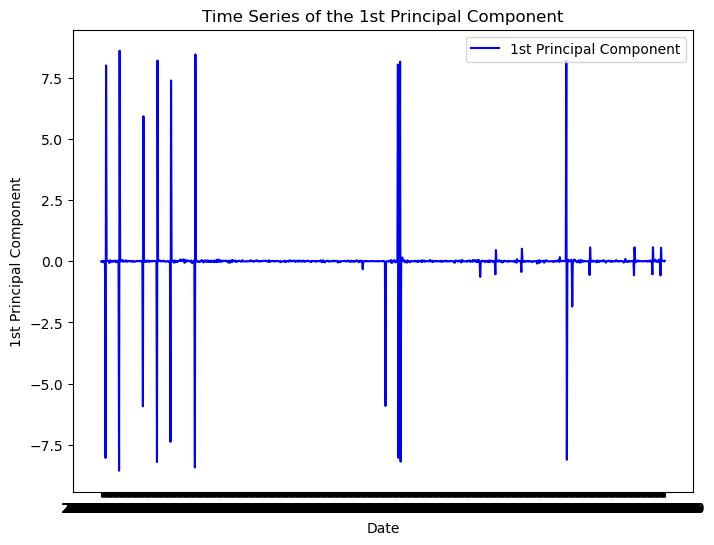

In [13]:
# Plotting the time series of the 1st principal component
plt.figure(figsize=(8, 6))
plt.plot(log_returns['date'], time_series_pc1, label='1st Principal Component', color='blue')
plt.xlabel('Date')
plt.ylabel('1st Principal Component')
plt.title('Time Series of the 1st Principal Component')
plt.legend()
plt.show()

In [14]:
# Identifying the date with the lowest value for the 1st principal component
min_date_index = np.argmin(time_series_pc1)
min_date = log_returns['date'].iloc[min_date_index]
min_value = time_series_pc1[min_date_index]

print(f"Date with the lowest value for the 1st principal component: {min_date}")
print(f"Lowest value for the 1st principal component: {min_value}")

Date with the lowest value for the 1st principal component: 2011-02-18
Lowest value for the 1st principal component: -8.55690358721129


In [20]:
# Problem 1 - Task b)2)

In [15]:
# Extracting the weights for the 1st and 2nd principal components
weights_pc1 = pca.components_[0]
weights_pc2 = pca.components_[1]

# Displaying the weights
print("Weights for the 1st principal component:")
print(weights_pc1)

print("\nWeights for the 2nd principal component:")
print(weights_pc2)

Weights for the 1st principal component:
[-2.53432357e-04 -4.24265641e-04  7.10542751e-05 -2.84996292e-04
 -5.72619142e-04  4.83386817e-05 -3.91390757e-04 -4.58434408e-04
 -6.23355389e-04 -9.66790406e-04 -1.90161299e-04 -1.46205151e-04
 -1.15296428e-03 -1.72594136e-04 -4.68930601e-04 -6.97485914e-04
  8.32226145e-04 -2.84771634e-04 -3.45667066e-04  2.36078671e-04
  5.68257965e-06 -6.03865332e-04  1.88067208e-04 -3.60323058e-04
 -8.37719988e-04 -1.43300062e-04 -5.86539013e-04  7.48145146e-05
  4.97410488e-04 -9.91840678e-05 -2.94322931e-04 -6.50148287e-05
 -1.48893275e-04 -7.82702002e-04  3.27133183e-04  1.33951228e-03
  3.81881715e-04 -5.37882867e-04 -1.64863697e-04 -1.07117661e-03
  5.46174428e-05  1.24382506e-04 -1.18797408e-04 -2.47941669e-04
 -2.03052052e-04  2.29708495e-04 -9.27833882e-05 -1.63851552e-03
 -5.88828380e-04 -1.88967778e-04 -7.00902935e-04 -6.55419524e-04
  6.85705246e-05 -1.94994383e-04 -3.93590788e-04 -7.42994119e-05
 -4.63434178e-04 -1.60462091e-04 -2.80157170e-04 

In [22]:
# Problem 1 - Task b)3)

In [16]:
# Loading the "SP500_ticker.csv" file
ticker = pd.read_csv("SP500_ticker.csv", encoding='ISO-8859-1')

In [17]:
# Creating a DataFrame with weights and tickers
weights_df = pd.DataFrame({'ticker': log_returns.columns[1:], 'weight_pc1': weights_pc1})

In [18]:
# Merging with sector information
merged_df = pd.merge(weights_df, ticker, left_on='ticker', right_on='ticker')

In [19]:
# Calculating the mean weight per sector
mean_weights_by_sector = merged_df.groupby('sector')['weight_pc1'].mean().reset_index()

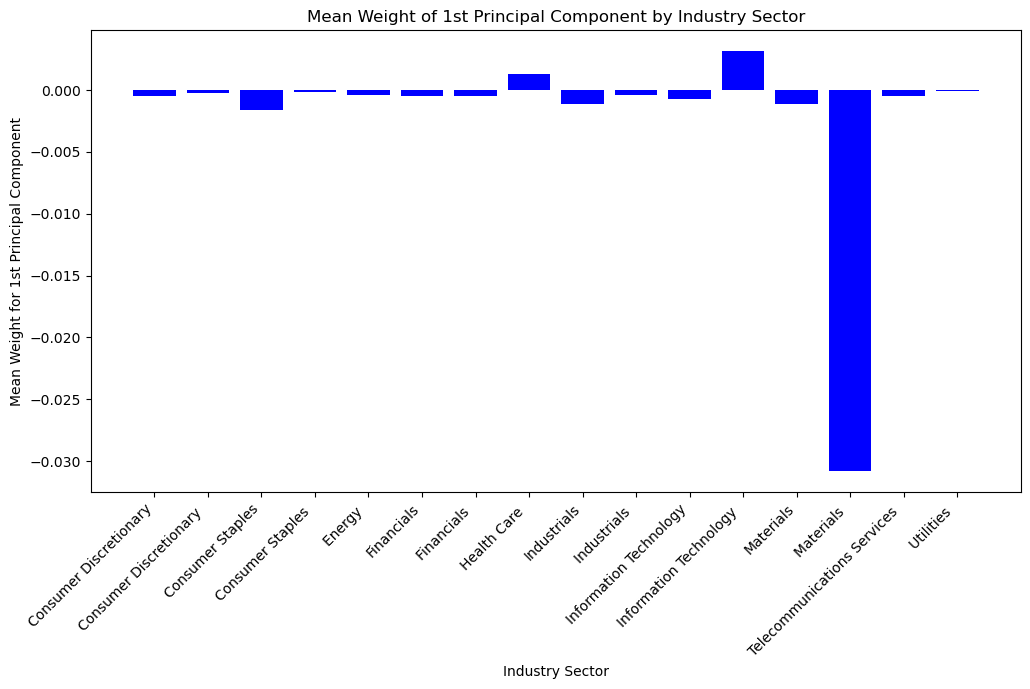

In [20]:
# Plotting the bar plot
plt.figure(figsize=(12, 6))
plt.bar(mean_weights_by_sector['sector'], mean_weights_by_sector['weight_pc1'], color='blue')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight for 1st Principal Component')
plt.title('Mean Weight of 1st Principal Component by Industry Sector')
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
# Problem 1 - Task b)4)

In [21]:
# Creating a DataFrame with weights and tickers
weights_df_pc2 = pd.DataFrame({'ticker': log_returns.columns[1:], 'weight_pc2': weights_pc2})

In [22]:
# Merging with sector information
merged_df_pc2 = pd.merge(weights_df_pc2, ticker, left_on='ticker', right_on='ticker')

In [23]:
# Calculating the mean weight per sector
mean_weights_by_sector_pc2 = merged_df_pc2.groupby('sector')['weight_pc2'].mean().reset_index()

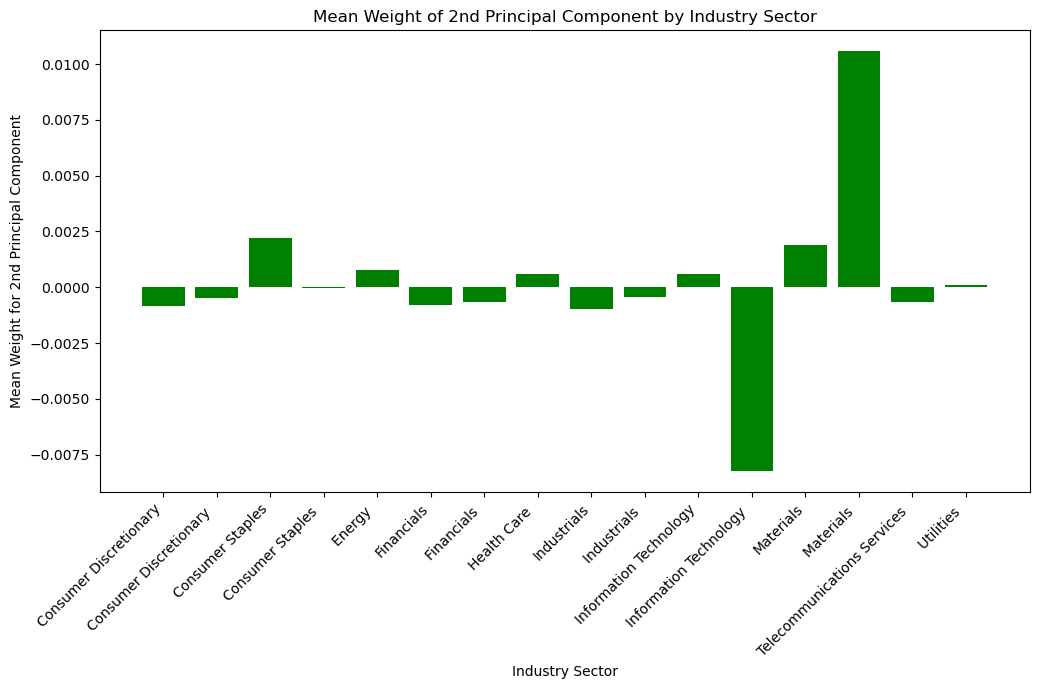

In [24]:
# Plotting the bar plot for the 2nd principal component
plt.figure(figsize=(12, 6))
plt.bar(mean_weights_by_sector_pc2['sector'], mean_weights_by_sector_pc2['weight_pc2'], color='green')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight for 2nd Principal Component')
plt.title('Mean Weight of 2nd Principal Component by Industry Sector')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Problem 1 - Task c)

In [ ]:
########################### PCA analysis on IBM stock price data ####################################

In [26]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Loading IBM stock price dataset
df = pd.read_csv('IBM_stock.csv')

In [27]:
# Displaying the first few rows of the dataset
print("Original Dataset:")
print(df.head())

Original Dataset:
             timestamp    open    high     low   close  volume
0  2023-11-24 17:00:00  155.18  155.18  155.18  155.18  335049
1  2023-11-24 16:55:00  155.11  155.18  155.11  155.18      40
2  2023-11-24 16:50:00  155.10  155.10  155.10  155.10       1
3  2023-11-24 16:40:00  155.05  155.05  155.05  155.05      40
4  2023-11-24 16:35:00  155.15  155.15  155.15  155.15     100


In [28]:
# Extracting relevant columns
features = ['open', 'high', 'low', 'close', 'volume']
X = df[features]

In [29]:
# Standardizing the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [30]:
# Applying PCA
pca = PCA()
principal_components = pca.fit_transform(X_standardized)

In [31]:
# Accessing explained variance
explained_variance_ratio = pca.explained_variance_ratio_

In [32]:
# Accessing principal components
principal_components_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, len(features) + 1)])

In [33]:
# Exploring explained variance
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)


Explained Variance Ratio:
[0.7779904  0.19959523 0.01596486 0.00533272 0.00111679]


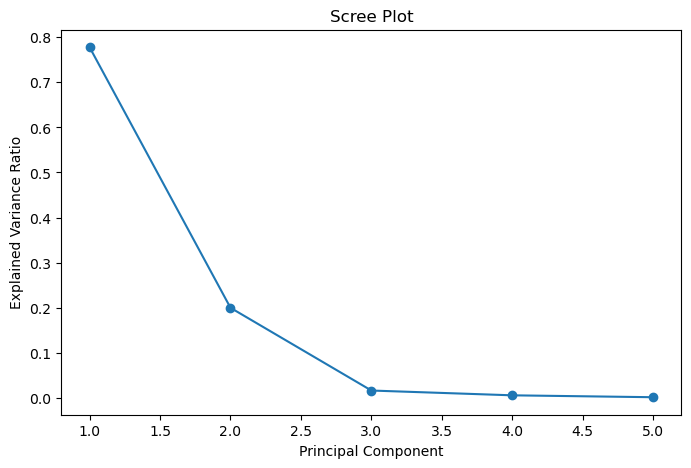

In [34]:
# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [35]:
# Exploring principal components DataFrame
print("\nPrincipal Components DataFrame:")
print(principal_components_df.head())


Principal Components DataFrame:
        PC1       PC2       PC3       PC4       PC5
0 -2.057171  3.175027 -0.269380 -0.136243 -0.015181
1 -1.696542 -0.408668 -0.039949  0.155174  0.008729
2 -1.414089 -0.405554 -0.100179 -0.060441  0.004553
3 -1.107342 -0.392993 -0.112638 -0.067566  0.003388
4 -1.720899 -0.416632 -0.087797 -0.053351  0.005708


In [36]:
# Feature contributions
components_df = pd.DataFrame(data=pca.components_, columns=features)
print("\nFeature Contributions:")
print(components_df)


Feature Contributions:
       open      high       low     close    volume
0 -0.501563 -0.497597 -0.498012 -0.501036 -0.042185
1 -0.015080  0.018502 -0.062975 -0.024664  0.997425
2  0.346394  0.626385 -0.574754 -0.393148 -0.052393
3 -0.620259  0.387704 -0.349319  0.585113 -0.024156
4  0.493454 -0.457584 -0.543739  0.501430 -0.005982


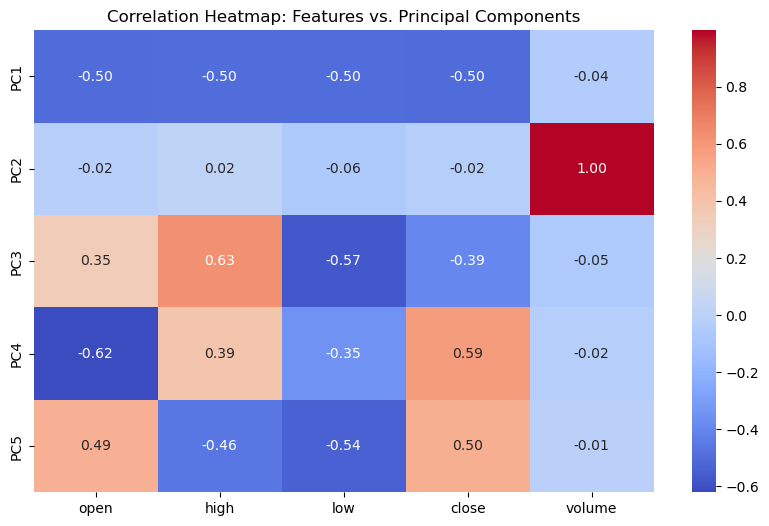

In [37]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(components_df, cmap='coolwarm', annot=True, fmt=".2f", xticklabels=features, yticklabels=principal_components_df.columns)
plt.title('Correlation Heatmap: Features vs. Principal Components')
plt.show()

In [33]:
######################################### problem 2: Task a) Wrapper method #############################################

In [38]:
from sklearn.model_selection import train_test_split

# Loading the data
data = pd.read_csv('BMI.csv')

# Defining features (X) and target (y)
X = data.drop('fatpctg', axis=1)
y = data['fatpctg']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# forward feature selection

from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector

forward_feature_selection = SequentialFeatureSelector(RandomForestRegressor(n_jobs = -1), 
                                                      k_features = (1, 13), 
                                                      forward = True,
                                                      floating = False,
                                                      verbose = 2,
                                                      scoring = "neg_mean_squared_error",
                                                      cv = 0).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    2.9s finished

[2023-11-27 10:42:29] Features: 1/13 -- score: -9.251547477433176[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.9s finished

[2023-11-27 10:42:30] Features: 2/13 -- score: -3.7100956965174143[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.9s finished

[2023-11-27 10:42:31] Features: 3/13 -- score: -3.558700233830845[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [40]:
# selected feature by forward feature selection

forward_feature_selection.k_feature_names_

('Weight',
 'Height',
 'Neck',
 'Abdomen',
 'Thigh',
 'Ankle',
 'Biceps',
 'Forearm',
 'Wrist')

In [41]:
# backward elimination

backward_feature_selection = SequentialFeatureSelector(RandomForestRegressor(n_jobs = -1), 
                                                      k_features = (1, 13), 
                                                      forward = False,
                                                      floating = False,
                                                      verbose = 2,
                                                      scoring = "neg_mean_squared_error",
                                                      cv = 0).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.4s finished

[2023-11-27 10:42:59] Features: 12/1 -- score: -3.2060205572139315[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.3s finished

[2023-11-27 10:43:01] Features: 11/1 -- score: -3.1411420398009957[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.2s finished

[2023-11-27 10:43:02] Features: 10/1 -- score: -3.1699946616915406[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [42]:
# selected feature by backward elimination

backward_feature_selection.k_feature_names_

('Weight',
 'Neck',
 'Abdomen',
 'Hip',
 'Thigh',
 'Knee',
 'Biceps',
 'Forearm',
 'Wrist')

In [39]:
######################################## problem 2: Task b) Filter method ################################################

In [43]:
import pandas as pd

# Loading the data
data = pd.read_csv('BMI.csv')

# Calculating correlation between features and the target variable (fatpctg)
correlation_with_target = data.drop('fatpctg', axis=1).apply(lambda x: x.corr(data['fatpctg']))

# Ranking features based on absolute correlation values
ranked_features = correlation_with_target.abs().sort_values(ascending=False)

# Printing the ranked features
print("Ranking of Features based on Correlation with 'fatpctg':")
print(ranked_features)

Ranking of Features based on Correlation with 'fatpctg':
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
dtype: float64


In [41]:
################################# problem 2) Task c) Embedded method ####################################33333

In [44]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Loading the data
data = pd.read_csv('BMI.csv')

# Defining features (X) and target (y)
X = data.drop('fatpctg', axis=1)
y = data['fatpctg']

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fitting Lasso regression model
lasso_model = Lasso(alpha=0.01)  # Adjust alpha based on your preference
lasso_model.fit(X_scaled, y)

# Getting feature coefficients
lasso_coefficients = pd.Series(lasso_model.coef_, index=X.columns)

# Ranking features based on absolute coefficient values
ranked_features_lasso = lasso_coefficients.abs().sort_values(ascending=False)

# Printing the ranked features
print("Ranking of Features based on Lasso Regression:")
print(ranked_features_lasso)

Ranking of Features based on Lasso Regression:
Abdomen    10.065850
Hip         1.770228
Wrist       1.585667
Weight      1.394999
Neck        1.260492
Thigh       1.235198
Forearm     0.862787
Age         0.858525
Biceps      0.394947
Height      0.317482
Chest       0.302490
Ankle       0.234365
Knee        0.202461
dtype: float64


In [45]:
from sklearn.ensemble import RandomForestRegressor

# Loading the data
data = pd.read_csv('BMI.csv')

# Defining features (X) and target (y)
X = data.drop('fatpctg', axis=1)
y = data['fatpctg']

# Fitting Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust parameters as needed
rf_model.fit(X, y)

# Getting feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Ranking features based on importance values
ranked_features_rf = feature_importances.sort_values(ascending=False)

# Printing the ranked features
print("Ranking of Features based on Random Forest Feature Importance:")
print(ranked_features_rf)

Ranking of Features based on Random Forest Feature Importance:
Abdomen    0.731153
Height     0.029401
Weight     0.029395
Wrist      0.026041
Knee       0.023688
Neck       0.023267
Hip        0.022485
Age        0.022080
Thigh      0.020623
Chest      0.020444
Ankle      0.019897
Biceps     0.017453
Forearm    0.014072
dtype: float64
